# THE SPARKS FOUNDATION #GRIPSEPT'21

## AUTHOR : Muskan Mittal, Data Science and Business Analytics Intern

## TASK-1 : Prediction Using Supervised ML 

### Predict the percentage of student based on no. of study hours

### Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
#Loading required dataset

data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
#Printing the dataset

data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#No of rows and columns in dataset

data.shape

(25, 2)

In [5]:
# first five values in dataset 
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

### Statistics of Dataset

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualisation of dataset

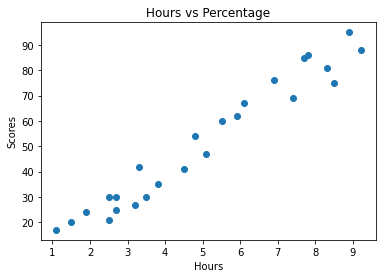

In [8]:
# Hours vs Scores as Percentage

plt.scatter(data['Hours'], data['Scores'])
plt.title("Hours vs Percentage")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Splitting the train-test data

In [15]:
from sklearn import model_selection

x = data["Hours"]
y = data["Scores"]
X_train, X_test, Y_train, Y_test  = model_selection.train_test_split(x, y, random_state=0)


### Training the simple Linear Regression Model on training dataset

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#Reshaping the data
X_train = np.asarray(X_train)
X_train = X_train.reshape((-1, 1))

X_test = np.asarray(X_test)
X_test = X_test.reshape((-1, 1))

#Fit the model
lr.fit(X_train, Y_train)


LinearRegression()

In [17]:
#Value of Slope or Coefficient
lr.coef_

array([9.94167834])

In [18]:
#Value of y-intercept
lr.intercept_

1.932204253151646

### Visualising the Regression Line

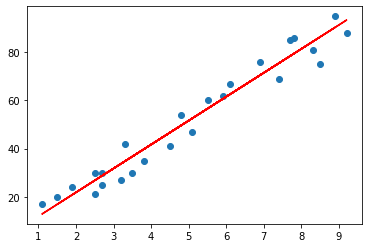

In [19]:
#Regression line y = m*x + c 
m = lr.coef_[0]
c = lr.intercept_

line = m*x + c

#Plotting

plt.scatter(x, y)
plt.plot(x, line, color = "red")
plt.show()

In [20]:
#Predicting the test set

y_pred = lr.predict(X_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

### Visualising the Training set results

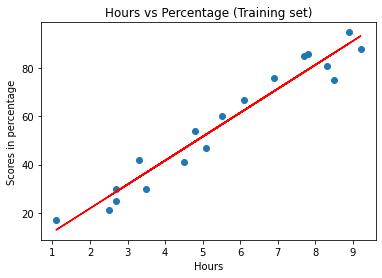

In [21]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, lr.predict(X_train), color = "red")
plt.xlabel("Hours")
plt.ylabel("Scores in percentage")
plt.title("Hours vs Percentage (Training set)")
plt.show()

### Visualising the Testing set results

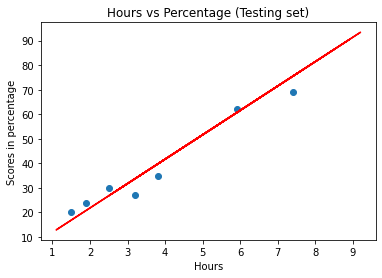

In [25]:
Y_test = np.asarray(Y_test)
Y_test = Y_test.reshape((-1, 1))

plt.scatter(X_test, Y_test)
plt.plot(X_train, lr.predict(X_train), color = "red")
plt.xlabel("Hours")
plt.ylabel("Scores in percentage")
plt.title("Hours vs Percentage (Testing set)")
plt.show()

### Error Metrics

In [29]:
from sklearn import metrics
print("Mean absolute error: ", metrics.mean_absolute_error(Y_test, y_pred))


Mean absolute error:  4.130879918502486


### Testing on Unknown data

In [32]:
hours = np.asarray([9.25]).reshape((-1, 1))
print("No. of hours studied: 9.25")
print("Predicted Percentage of Student" ,lr.predict(hours)[0])

No. of hours studied: 9.25
Predicted Percentage of Student 93.89272889341655
